In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load data
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Shape of dataset: (284807, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V2

Class
0    284315
1       492
Name: count, dtype: int64


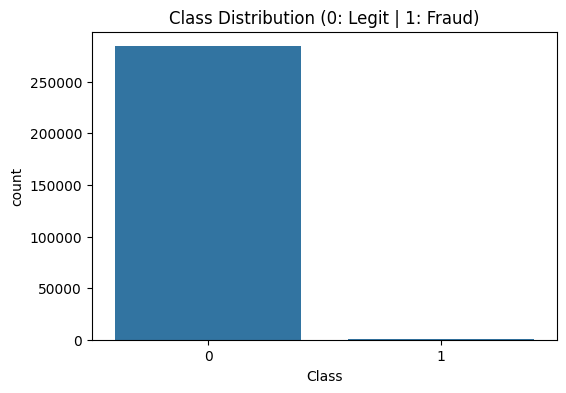

Fraud Ratio: 0.00173


In [7]:
# Value counts
fraud_counts = df['Class'].value_counts()
print(fraud_counts)

# Plot
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class')
plt.title("Class Distribution (0: Legit | 1: Fraud)")
plt.show()

# Fraud ratio
fraud_ratio = fraud_counts[1] / fraud_counts.sum()
print(f"Fraud Ratio: {fraud_ratio:.5f}")

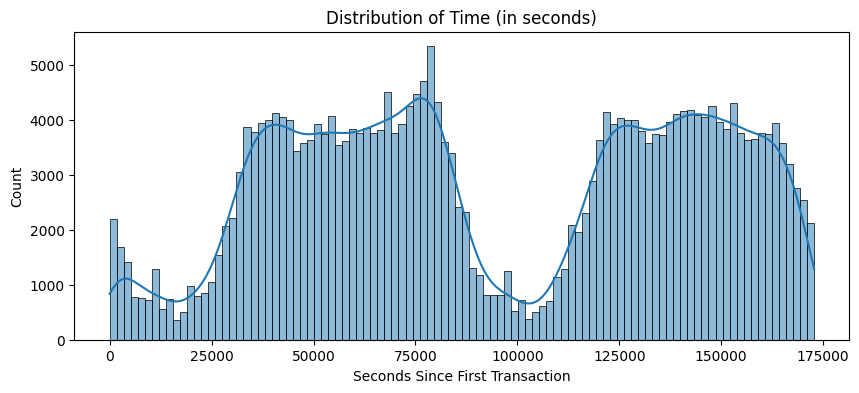

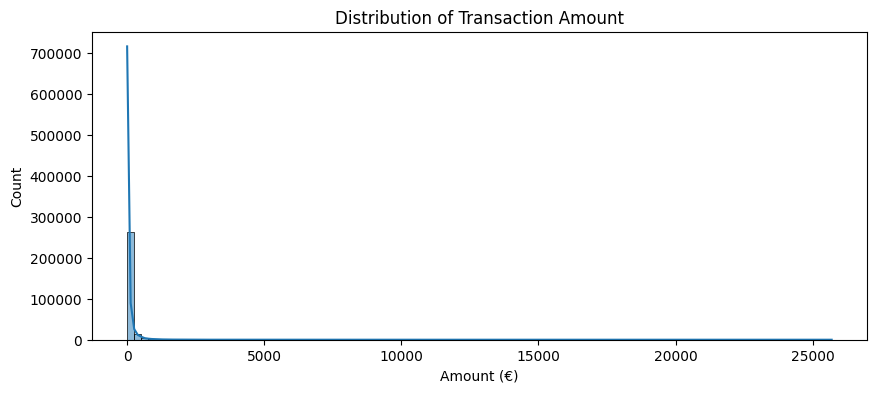

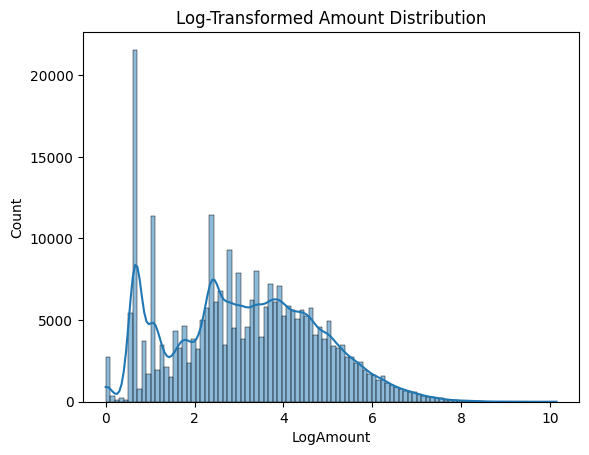

In [8]:
# Time Distribution
plt.figure(figsize=(10,4))
sns.histplot(df['Time'], bins=100, kde=True)
plt.title("Distribution of Time (in seconds)")
plt.xlabel("Seconds Since First Transaction")
plt.show()

# Amount Distribution
plt.figure(figsize=(10,4))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Distribution of Transaction Amount")
plt.xlabel("Amount (€)")
plt.show()

# Log-transform for better visibility
df['LogAmount'] = np.log1p(df['Amount'])
sns.histplot(df['LogAmount'], bins=100, kde=True)
plt.title("Log-Transformed Amount Distribution")
plt.show()

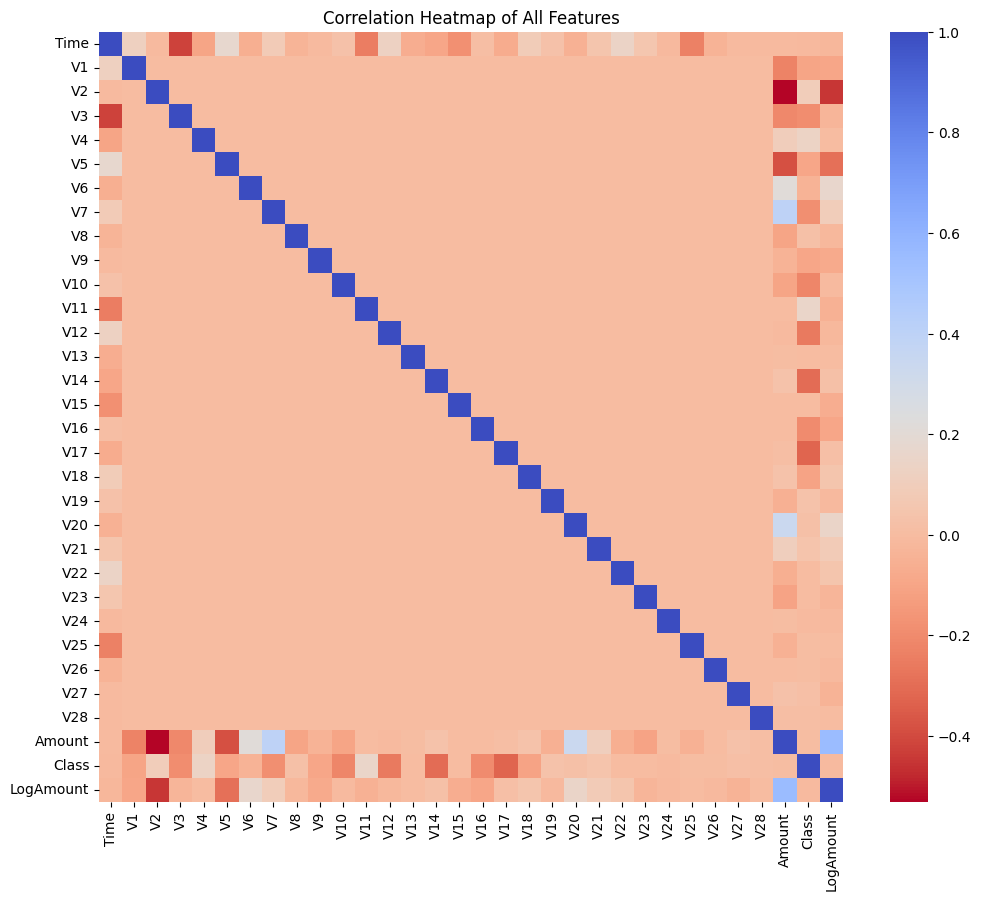

In [9]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot=False)
plt.title("Correlation Heatmap of All Features")
plt.show()

In [10]:
# Correlation with target
corr_target = corr['Class'].sort_values(ascending=False)
print("Top features positively correlated with fraud:\n", corr_target.head(10))
print("Top features negatively correlated with fraud:\n", corr_target.tail(10))

Top features positively correlated with fraud:
 Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64
Top features negatively correlated with fraud:
 V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_8247/2791003122.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=class_counts.values, palette='pastel')


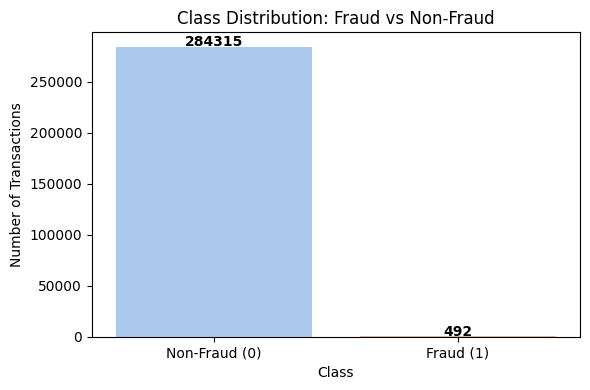

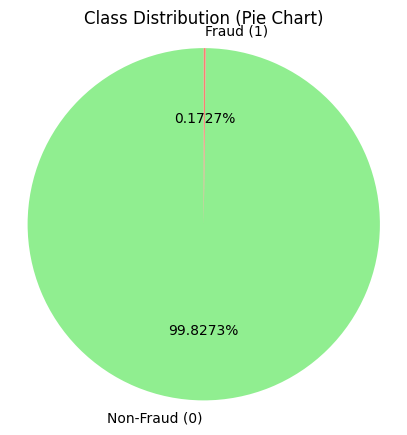

🔍 Fraud Ratio: 0.00173 (0.1727%)


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("creditcard.csv")  # Adjust the path if needed

# Count class distribution
class_counts = df['Class'].value_counts().sort_index()
labels = ['Non-Fraud (0)', 'Fraud (1)']

# 🔹 1. Bar Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=class_counts.values, palette='pastel')
plt.title("Class Distribution: Fraud vs Non-Fraud")
plt.ylabel("Number of Transactions")
plt.xlabel("Class")
for i, v in enumerate(class_counts.values):
    plt.text(i, v + 500, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# 🔹 2. Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(class_counts, labels=labels, autopct='%1.4f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title("Class Distribution (Pie Chart)")
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle
plt.show()

# 🔹 3. Print Class Ratio
fraud_ratio = class_counts[1] / class_counts.sum()
print(f"🔍 Fraud Ratio: {fraud_ratio:.5f} ({fraud_ratio*100:.4f}%)")

/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_8247/887378266.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Class', y='Amount', palette='Set2')


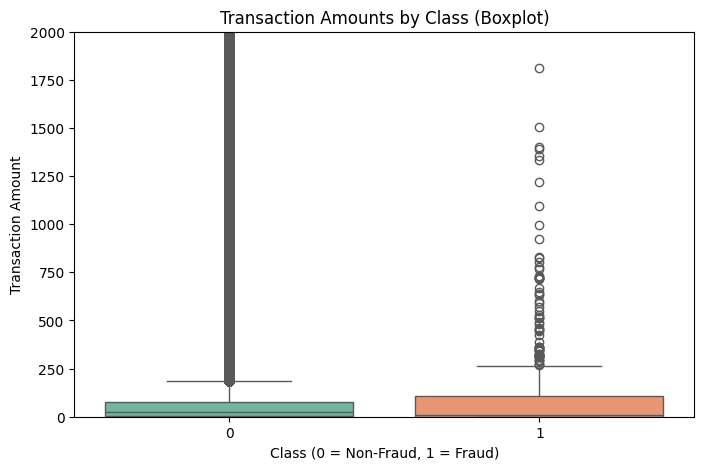

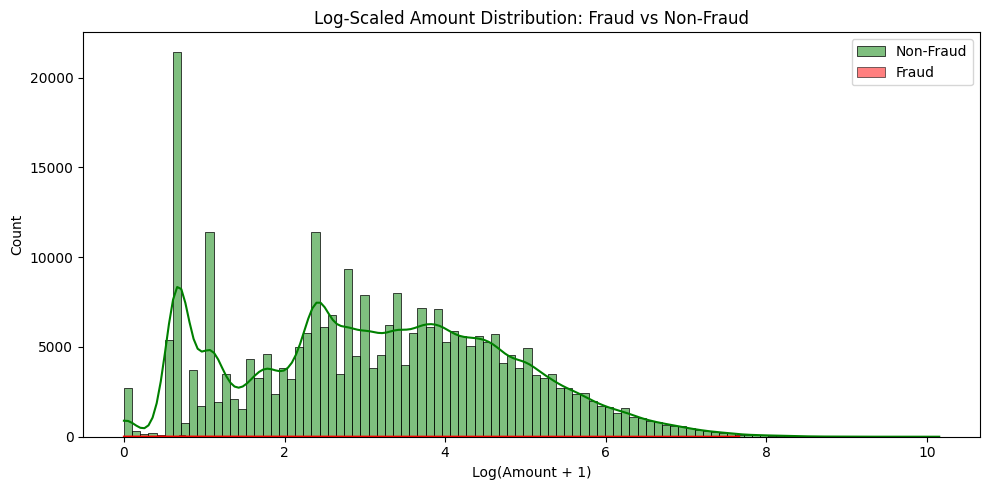

🔍 Summary of Amounts by Class:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("creditcard.csv")  # Adjust path as needed

# Optional: Create a 'log amount' column to handle skew
df['LogAmount'] = np.log1p(df['Amount'])

# 🔹 1. Boxplot of Amount by Class
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Class', y='Amount', palette='Set2')
plt.title("Transaction Amounts by Class (Boxplot)")
plt.xlabel("Class (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount")
plt.ylim(0, 2000)  # Optional: limit outliers for readability
plt.show()

# 🔹 2. Histogram of Log(Amount) by Class
plt.figure(figsize=(10, 5))
sns.histplot(data=df[df['Class'] == 0], x='LogAmount', bins=100, label='Non-Fraud', color='green', kde=True)
sns.histplot(data=df[df['Class'] == 1], x='LogAmount', bins=100, label='Fraud', color='red', kde=True)
plt.title("Log-Scaled Amount Distribution: Fraud vs Non-Fraud")
plt.xlabel("Log(Amount + 1)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# 🔹 3. Optional Insight: Summary statistics
print("🔍 Summary of Amounts by Class:")
print(df.groupby('Class')['Amount'].describe())